In [6]:
import sys, os
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))
from stochss_compute.cloud.ec2 import Cluster
import gillespy2
import numpy

### 1. Configuration
1. First, create an AWS account [here](https://aws.amazon.com/).
2. In order to make the AWS API calls to your account, you need an AWS access key and access key ID. From the IAM dashboard, click 'Manage access keys'. Then, under the Access keys tab, click 'Create New Access Key'. This file can only be downloaded once, but if something happens you can just make a new one. This file contains an Access Key ID and a Secret Access Key.
1. Download and install [AWS Command Line Interface](https://aws.amazon.com/cli/).

In [2]:
cluster = Cluster()

In [3]:
cluster.launch_single_node_cluster()

Launching Network.......
Launching StochSS-Compute server instance.......(This could take a minute)
Instance "i-0959a4c085a9d6225" is running.
Waiting on docker.
StochSS-Compute is running.
Restricting server access to only your ip.
[SourceIpRequest] http://3.143.241.133:29681/api/v1/cloud/sourceip
StochSS-Compute ready to go!


In [7]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            ''' 
            PARAMETERS:
            These are constant values relevant to the system, such as reaction kinetic rates.
            
            name: user defined name for reference
            expression: constant value
            '''
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.51)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.11)
            
            # Add parameters to the model
            self.add_parameter([rate1,rate2,rate3])
            
            '''
            SPECIES:
            These can be anything that participates in or is produced by a reaction channel.
            
            name: A user defined name for the species
            initial_value: value/population count of species at start of simulation
            '''
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=121)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            
            # Add species to the model
            self.add_species([A, B, C, D])
            
            '''Reactions:
            These are the reaction channels causing the system to change over time
            
            name: a user defined name for the reaction
            reactants: dictionary with participant reactants as keys, and consumed per reaction as value.
            products: dictionary with reaction products as keys, and number formed per reaction as value.
            rate: parameter rate constant to be applied to the propensity of this reaction firing
            propensity_function: can be used instead of rate in order to declare a custom propensity function in string format'''
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            
            # Add reactions to the model
            self.add_reaction([r1,r2,r3])
            
            # Set timespan of model
            self.timespan(numpy.linspace(0,101,102))
myModel = MichaelisMenten()

In [8]:
remoteResults = cluster.run(myModel)

[ModelRunRequest] http://3.143.241.133:29681/api/v1/gillespy2/model/run


[GET] http://3.143.241.133:29681/api/v1/job/ffcb4f381e15e38fe707840023301b1b-run_1/status
The job is complete.
4
[GET] http://3.143.241.133:29681/api/v1/memory/ffcb4f381e15e38fe707840023301b1b-run_1/get
Results size: 2121
Expanded to: 37231


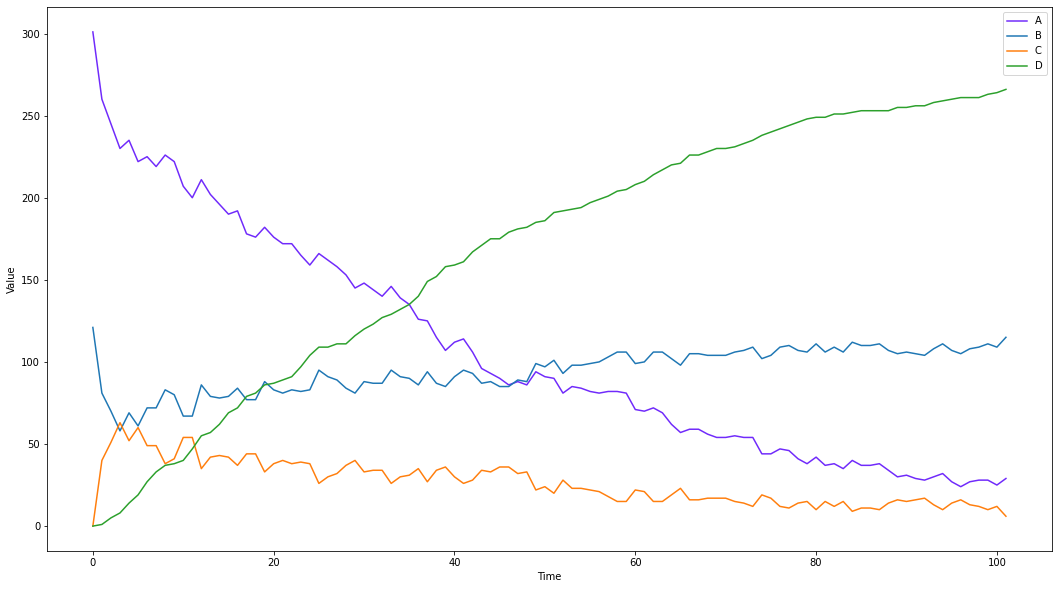

In [9]:
results = remoteResults.resolve()
results.plot()

In [10]:
cluster.clean_up()

Terminating "i-0959a4c085a9d6225". This might take a minute.......
Instance i-0959a4c085a9d6225" terminated.
Deleting sg-0b973b0e9b3318648.......
Security group sg-0b973b0e9b3318648 deleted.
Deleting subnet-058426ef2fbddecef.......
Subnet subnet-058426ef2fbddecef deleted.
Detaching igw-0ada65385704f13ca.......
Gateway igw-0ada65385704f13ca detached.
Deleting igw-0ada65385704f13ca.......
Gateway igw-0ada65385704f13ca deleted.
Deleting vpc-0ac05a0e40d99660f.......
VPC vpc-0ac05a0e40d99660f deleted.
Deleting "sssc-root".
Key Pair "sssc-root" deleted.
Deleting "./sssc-root.pem".
Root key deleted.
